In [6]:
## Filtering effect of network inversion on decorrelation noise
## comparison between observed interferometric phase and reconstructed phase from inverted time-series

import os
import numpy as np
import matplotlib.pyplot as plt
import pysar.plot_network as pnet
from pysar.simulation.plot import *
from pysar.objects import sensor, ifgramStack
from pysar.utils import readfile, plot as pp, utils as ut


work_dir = '~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to diretory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

ifgram_file = './INPUTS/ifgramStack.h5'
ts_file = 'timeseries.h5'
mask_file = 'maskTempCoh.h5'
water_mask_file = 'waterMask.h5'

date12 = '20070115_20110313'
m_date, s_date = date12.split('_')

obj = ifgramStack(ifgram_file)
obj.open()
range2phase = -4. * np.pi / float(obj.metadata['WAVELENGTH'])

dem = readfile.read('./INPUTS/geometryRadar.h5', datasetName='height')[0]

# read coherence
coh = readfile.read(ifgram_file, datasetName='coherence-{}'.format(date12))[0]
water_mask = readfile.read(water_mask_file)[0]
coh[water_mask==0] = 0.

# read interferometric phase
pha_orig = readfile.read(ifgram_file, datasetName='unwrapPhase-{}'.format(date12))[0]
pha_orig[pha_orig==0] = np.nan
pha_orig -= pha_orig[obj.refY, obj.refX]
pha_orig[water_mask==0] = np.nan
pha_orig = ut.wrap(pha_orig)

# read reconstructed phase
pha_recon =  readfile.read(ts_file, datasetName=s_date)[0]
pha_recon -= readfile.read(ts_file, datasetName=m_date)[0]
pha_recon *= range2phase
pha_recon[pha_recon==0] = np.nan
pha_recon[water_mask==0] = np.nan
pha_recon = ut.wrap(pha_recon)

Go to diretory: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR
open ifgramStack file: ifgramStack.h5
reading height data from file: ./INPUTS/geometryRadar.h5 ...
reading coherence data from file: ./INPUTS/ifgramStack.h5 ...
reading unwrapPhase data from file: ./INPUTS/ifgramStack.h5 ...
reading timeseries data from file: timeseries.h5 ...
reading timeseries data from file: timeseries.h5 ...


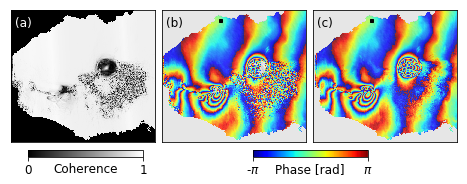

In [8]:
## Plot
inps = pp.cmd_line_parse()
inps.disp_dem_contour = False

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[8, 3])
ax[1] = pp.plot_dem_background(ax=ax[1], geo_box=None, dem=dem, inps=inps, print_msg=False)
ax[2] = pp.plot_dem_background(ax=ax[2], geo_box=None, dem=dem, inps=inps, print_msg=False)

im0 = ax[0].imshow(coh,       vmin=0,        vmax=1,      cmap='gray')
im1 = ax[1].imshow(pha_orig,  vmin=-1.*np.pi, vmax=np.pi, cmap='jet', alpha=0.8)
im2 = ax[2].imshow(pha_recon, vmin=-1.*np.pi, vmax=np.pi, cmap='jet', alpha=0.8)

ax[1].plot(obj.refX, obj.refY, 'ks', ms=3)
ax[2].plot(obj.refX, obj.refY, 'ks', ms=3)

for axi in ax:
    pp.auto_flip_direction(obj.metadata, ax=axi, print_msg=False)
    axi.get_xaxis().set_ticks([])
    axi.get_yaxis().set_ticks([])
plt.subplots_adjust(wspace=0.05)

# Number
ax[0].annotate('(a)', xy=(0.03, 0.88), color='w', xycoords='axes fraction', fontsize=font_size)
ax[1].annotate('(b)', xy=(0.03, 0.88), color='k', xycoords='axes fraction', fontsize=font_size)
ax[2].annotate('(c)', xy=(0.03, 0.88), color='k', xycoords='axes fraction', fontsize=font_size)

## colorbar
cax0 = fig.add_axes([0.155, 0.13, 0.2, 0.03])
cbar0 = plt.colorbar(im0, cax=cax0, ticks=[0., 1.], orientation='horizontal')
cbar0.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar0.set_label('Coherence', fontsize=font_size, labelpad=-14)

cax1 = fig.add_axes([0.545, 0.13, 0.2, 0.03])
cbar1 = plt.colorbar(im1, cax=cax1, ticks=[-1.*np.pi, np.pi], orientation='horizontal')
cbar1.ax.set_xticklabels([r'-$\pi$', r'$\pi$'])
cbar1.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar1.set_label('Phase [rad]', fontsize=font_size, labelpad=-14)

plt.savefig('{}_netInv_filter.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

In [48]:
np.nanmax(pha_recon)

3.1415818